In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

model = Sequential([
    Conv2D(10, (5, 5), activation='relu', padding='valid', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(20, (5, 5), activation='relu', padding='valid'),
    Dropout(0.5),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

model.save('mnist_cnn_model.h5')

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
938/938 [==============================] - 38s 39ms/step - loss: 0.2617 - accuracy: 0.9196 - val_loss: 0.1036 - val_accuracy: 0.9750
Epoch 2/5
938/938 [==============================] - 30s 32ms/step - loss: 0.0920 - accuracy: 0.9714 - val_loss: 0.0618 - val_accuracy: 0.9856
Epoch 3/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0704 - accuracy: 0.9780 - val_loss: 0.0507 - val_accuracy: 0.9880
Epoch 4/5
938/938 [==============================] - 27s 29ms/step - loss: 0.0580 - accuracy: 0.9816 - val_loss: 0.0497 - val_accuracy: 0.9870
Epoch 5/5
938/938 [==============================] - 26s 28ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.0387 - val_accuracy: 0.9899
313/313 - 1s - loss: 0.0387 - accuracy: 0.9899 - 1s/epoch - 4ms/step

Test accuracy: 0.9898999929428101


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


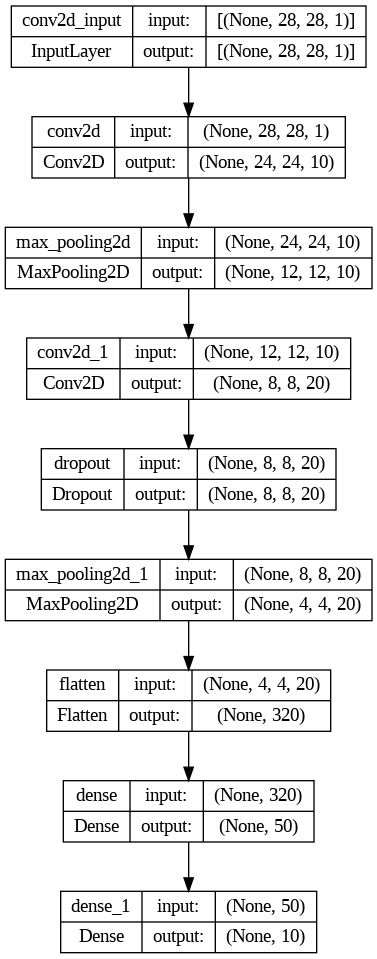

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

export_model = tf.keras.models.load_model('mnist_cnn_model.h5')

plot_model(export_model, to_file='mnist_cnn_model_plot.png', show_shapes=True)